In [19]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
fx = pd.read_csv('../data/crc_{}_mut_cna_fus_clin.csv'.format('folfox'), index_col=0)
fi = pd.read_csv('../data/crc_{}_mut_cna_fus_clin.csv'.format('folfiri'), index_col=0)

In [21]:
fx.head()

,id_institution,id_drugs_list,OS,id_tt_os_g_mos,PFS,id_tt_pfs_m_g_mos,mut_CDK4,mut_CCND3,mut_CDH1,mut_CDK8,...,clin_ca_first_dmets1,clin_ca_crc_td,clin_ca_crc_crm,clin_ca_crc_peri_inv,clin_crc_type,OS_time,clin_Histology Category,clin_Histology,clin_Derived Grade or Differentiation of Tumor,clin_CEA
GENIE-DFCI-000233,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,100.986842,0.0,31.578947,0,0,0,0,...,5,2,2,0,2,3303,0,0,1,1.0
GENIE-DFCI-000247,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",1,35.789474,0.0,3.914474,0,0,0,0,...,0,2,0,0,2,1163,0,0,0,4.9
GENIE-DFCI-000306,DFCI,"bev, Fluorouracil, Leucovorin Calcium, Oxalipl...",0,38.125000,0.0,12.960526,0,0,0,0,...,1,2,2,0,3,1230,0,0,1,0.7
GENIE-DFCI-000738,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,51.578947,NaN,NaN,0,0,0,0,...,5,0,2,0,3,1623,0,1,1,1.8
GENIE-DFCI-000924,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,65.361842,NaN,NaN,0,0,0,0,...,5,0,2,1,0,2039,0,0,1,0.6


In [22]:
today_str = '061923'
fx_params = pd.read_csv('../results/hp_search/results_xgb_folfox_OS_comb_061923.csv', index_col=0)
fx_params.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_reg_alpha,...,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
106,0.844353,0.012263,0.013088,0.000349,0.6,0.050,12,6,200,5.0,...,0.6,"OrderedDict([('colsample_bytree', 0.6), ('lear...",0.781406,0.795407,0.805589,0.712890,0.711929,0.761444,0.040768,1
98,0.329449,0.006978,0.011500,0.000433,0.6,0.100,20,6,20,0.0,...,0.6,"OrderedDict([('colsample_bytree', 0.6), ('lear...",0.774322,0.790869,0.783564,0.730127,0.726756,0.761128,0.027219,2
80,0.851291,0.019567,0.014542,0.000353,0.6,0.075,8,4,200,5.0,...,0.4,"OrderedDict([('colsample_bytree', 0.6), ('lear...",0.783509,0.809242,0.807471,0.703887,0.700780,0.760978,0.048748,3
33,0.227492,0.005242,0.011838,0.000272,0.6,0.050,12,6,50,1.0,...,0.4,"OrderedDict([('colsample_bytree', 0.6), ('lear...",0.765910,0.790647,0.799281,0.740119,0.708807,0.760953,0.033252,4
88,0.120959,0.000590,0.011002,0.000267,0.6,0.100,12,6,20,0.5,...,0.4,"OrderedDict([('colsample_bytree', 0.6), ('lear...",0.762535,0.799281,0.785279,0.739460,0.718172,0.760945,0.029514,5


In [23]:

colsample_bytree = fx_params['param_colsample_bytree'].values[0]
lr = fx_params['param_learning_rate'].values[0]
max_depth = fx_params['param_max_depth'].values[0]
min_child_weight = fx_params['param_min_child_weight'].values[0]
n_estimators = fx_params['param_n_estimators'].values[0]
reg_alpha = fx_params['param_reg_alpha'].values[0]
reg_lambda = fx_params['param_reg_lambda'].values[0]
subsample = fx_params['param_subsample'].values[0]
xgb_fx = XGBClassifier(colsample_bytree=colsample_bytree, learning_rate=lr, max_depth=max_depth,
                          min_child_weight=min_child_weight, n_estimators=n_estimators, reg_alpha=reg_alpha,
                            reg_lambda=reg_lambda, subsample=subsample, random_state=0, n_jobs=-1)

fi_params = pd.read_csv('../results/hp_search/results_xgb_folfiri_OS_comb_061923.csv', index_col=0)

colsample_bytree = fi_params['param_colsample_bytree'].values[0]
lr = fi_params['param_learning_rate'].values[0]
max_depth = fi_params['param_max_depth'].values[0]
min_child_weight = fi_params['param_min_child_weight'].values[0]
n_estimators = fi_params['param_n_estimators'].values[0]
reg_alpha = fi_params['param_reg_alpha'].values[0]
reg_lambda = fi_params['param_reg_lambda'].values[0]
subsample = fi_params['param_subsample'].values[0]
xgb_fi = XGBClassifier(colsample_bytree=colsample_bytree, learning_rate=lr, max_depth=max_depth,
                            min_child_weight=min_child_weight, n_estimators=n_estimators, reg_alpha=reg_alpha,
                            reg_lambda=reg_lambda, subsample=subsample, random_state=0, n_jobs=-1)



In [24]:
X_fx = fx[[col for col in fx.columns if 'mut_' in col or 'cna_' in col or 'clin_' in col or 'fus_' in col]]
y_fx = fx['OS']
X_fi = fi[[col for col in fi.columns if 'mut_' in col or 'cna_' in col or 'clin_' in col or 'fus_' in col]]
y_fi = fi['OS']

xgb_fx.fit(X_fx, y_fx)
xgb_fi.fit(X_fi, y_fi)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [25]:
fx = fx.loc[fx['clin_stage_dx_iv'] == 1]
fi = fi.loc[fi['clin_stage_dx_iv'] == 1]

X_fx = fx[[col for col in fx.columns if 'mut_' in col or 'cna_' in col or 'clin_' in col or 'fus_' in col]]
y_fx = fx['OS']
X_fi = fi[[col for col in fi.columns if 'mut_' in col or 'cna_' in col or 'clin_' in col or 'fus_' in col]]
y_fi = fi['OS']

In [26]:
fx['pred'] = xgb_fx.predict_proba(X_fx)[:, 1]
fi['pred'] = xgb_fi.predict_proba(X_fi)[:, 1]

In [27]:
from sklearn.model_selection import cross_val_predict
# Use cross_val_predict to generate predictions for X_fx
y_pred_fx = cross_val_predict(xgb_fx, X_fx, y_fx, cv=5, method='predict_proba')[:, 1]

# Use cross_val_predict to generate predictions for X_fi
y_pred_fi = cross_val_predict(xgb_fi, X_fi, y_fi, cv=5, method='predict_proba')[:, 1]

fx['pred'] = y_pred_fx
fi['pred'] = y_pred_fi

from sklearn.metrics import roc_auc_score
auc_fx = roc_auc_score(y_fx, y_pred_fx)
auc_fi = roc_auc_score(y_fi, y_pred_fi)
print('AUC for Folfox: {:.3f}'.format(auc_fx))
print('AUC for Folfiri: {:.3f}'.format(auc_fi))


AUC for Folfox: 0.649
AUC for Folfiri: 0.611


In [28]:
fx['pred_quartile'] = pd.qcut(fx['pred'], 3, labels=False)
fi['pred_quartile'] = pd.qcut(fi['pred'], 3, labels=False)

In [29]:
#rename the three quartiles to low, medium, high
fx['pred_quartile'] = fx['pred_quartile'].replace({0: 'low risk', 1: 'medium risk', 2: 'high risk'})
fi['pred_quartile'] = fi['pred_quartile'].replace({0: 'low risk', 1: 'medium risk', 2: 'high risk'})

In [30]:
def plot_km(data, stratify_by, time, outcome):
    data_stage = {}
    km_stage = {}
    stages = data[stratify_by].unique()
    for stage in stages:
        data_stage[stage] = data[data[stratify_by] == stage]
        km_stage[stage] = pd.DataFrame(columns=['time', 'n_patients', 'n_died', 'prob_survival'])
        n_patients = data_stage[stage].shape[0]
        prob_survival = 1
        time_thresh = 36
        data_stage[stage][time] = data_stage[stage][time].astype(int)
        #loop through each time point in time_thresh
        for t in range(0, time_thresh + 1):
            n_patients = n_patients - data_stage[stage][(data_stage[stage][time] == t) & (data_stage[stage][outcome] == 0)].shape[0]
            n_died = data_stage[stage][(data_stage[stage][time] == t) & (data_stage[stage][outcome] == 1)].shape[0]
            prob_survival = prob_survival * (1 - n_died/n_patients)
            perc_died = n_died/n_patients
            km_stage[stage] = pd.concat([km_stage[stage], pd.DataFrame([[t, n_patients, n_died, prob_survival]], columns=['time', 'n_patients', 'n_died', 'prob_survival'])], axis=0)
            n_patients = n_patients - n_died
    # cmap = sns.color_palette('mako', n_colors=len(stages))
    # colors = {}
    # for i, stage in enumerate(stages):
    #     colors[stage] = cmap[i]
    # plt.figure(figsize=(10,10))
    # for stage in km_stage.keys():
    #     plt.plot(km_stage[stage]['time'], km_stage[stage]['prob_survival'], label=stage, color=colors[stage], linewidth=3, alpha=0.8)
    # plt.xlabel('Time (days)')
    # plt.ylabel('Probability of survival')
    # plt.legend()
    # plt.rcParams.update({'font.size': 20})
    # plt.show()
    return data_stage, km_stage

/tmp/ipykernel_1395636/1182417702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stage[stage][time] = data_stage[stage][time].astype(int)
/tmp/ipykernel_1395636/1182417702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stage[stage][time] = data_stage[stage][time].astype(int)
/tmp/ipykernel_1395636/1182417702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

high risk
medium risk
low risk


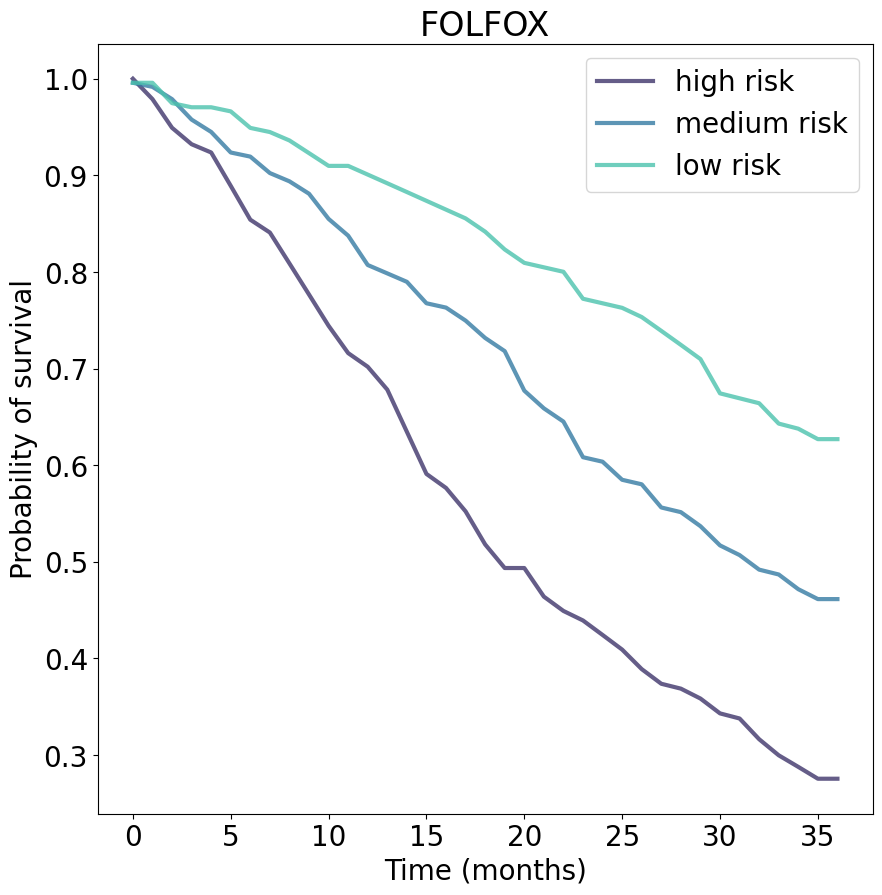

In [31]:
data_stage, km_stage = plot_km(fx, 'pred_quartile', 'id_tt_os_g_mos', 'OS')
stages = fx['pred_quartile'].unique()
cmap = sns.color_palette('mako', n_colors=len(stages))
colors = {}
for i, stage in enumerate(stages):
    colors[stage] = cmap[i]
plt.figure(figsize=(10,10))
for stage in km_stage.keys():
    print(stage)
    plt.plot(km_stage[stage]['time'], km_stage[stage]['prob_survival'], label=stage, color=colors[stage], linewidth=3, alpha=0.8)
plt.xlabel('Time (months)')
plt.ylabel('Probability of survival')
plt.legend()
plt.title('FOLFOX')
plt.rcParams.update({'font.size': 20})
plt.savefig('../results/figures/km_folfox.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_1395636/1182417702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stage[stage][time] = data_stage[stage][time].astype(int)
/tmp/ipykernel_1395636/1182417702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stage[stage][time] = data_stage[stage][time].astype(int)
/tmp/ipykernel_1395636/1182417702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

high risk
medium risk
low risk


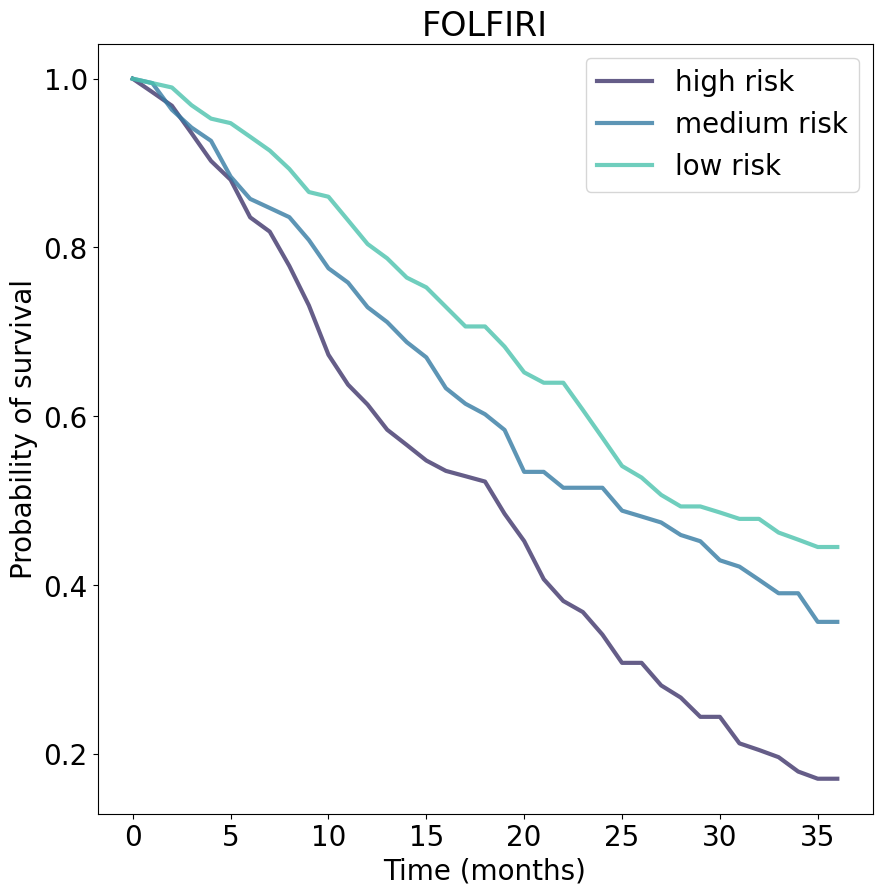

In [32]:
data_stage, km_stage = plot_km(fi, 'pred_quartile', 'id_tt_os_g_mos', 'OS')
stages = fx['pred_quartile'].unique()
cmap = sns.color_palette('mako', n_colors=len(stages))
colors = {}
for i, stage in enumerate(stages):
    colors[stage] = cmap[i]
plt.figure(figsize=(10,10))
for stage in km_stage.keys():
    print(stage)
    plt.plot(km_stage[stage]['time'], km_stage[stage]['prob_survival'], label=stage, color=colors[stage], linewidth=3, alpha=0.8)
plt.xlabel('Time (months)')
plt.ylabel('Probability of survival')
plt.legend()
plt.title('FOLFIRI')
plt.rcParams.update({'font.size': 20})
plt.savefig('../results/figures/km_folfiri.png', dpi=300, bbox_inches='tight')

In [33]:
fi['pred_folfox'] = xgb_fx.predict_proba(X_fi)[:, 1]

fx['pred_folfiri'] = xgb_fi.predict_proba(X_fx)[:, 1]

In [34]:
fi['pred_diff'] = fi['pred'] - fi['pred_folfox']
fx['pred_diff'] = fx['pred'] - fx['pred_folfiri']

<Axes: >

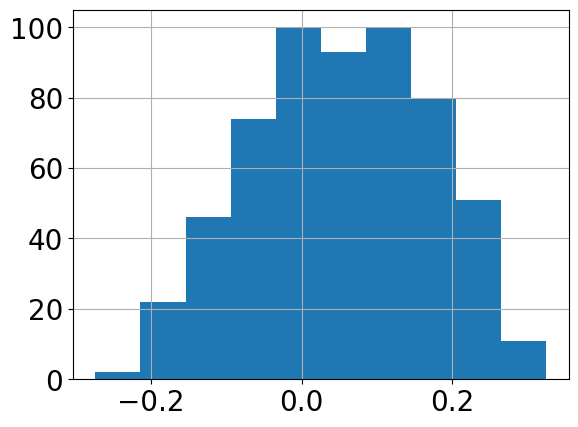

In [35]:
fi['pred_diff'].hist()

In [36]:
fi.loc[fi['pred_diff'] > 0.4]

,id_institution,id_drugs_list,OS,id_tt_os_g_mos,PFS,id_tt_pfs_m_g_mos,mut_CDK4,mut_CCND3,mut_CDH1,mut_CDK8,...,clin_crc_type,OS_time,clin_Histology Category,clin_Histology,clin_Derived Grade or Differentiation of Tumor,clin_CEA,pred,pred_quartile,pred_folfox,pred_diff


<Axes: >

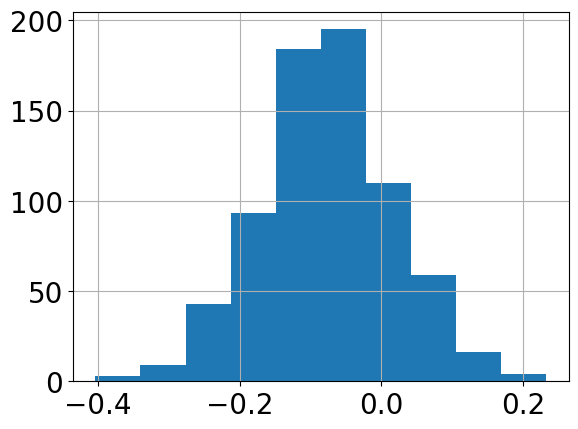

In [37]:
fx['pred_diff'].hist()